In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import os

data_path = os.getcwd() + '/data'
print(data_path)

/Users/gisderdube/Documents/_projects/ai.nosync/vision/mnist
/Users/gisderdube/Documents/_projects/ai.nosync/vision/mnist/data


In [52]:
data = ImageDataBunch.from_folder(data_path, train = 'training', test="testing", valid_pct=0.2)

(Image (3, 28, 28), Category 9)


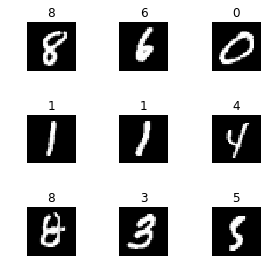

In [53]:
print(data.train_ds[0])
data.show_batch(rows=3, figsize=(4,4))

In [5]:
data.classes, data.c,  len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10, 48001, 11999, 10000)

In [54]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [56]:
lr=5e-3

In [57]:
learn.fit_one_cycle(4, max_lr=lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.218675,0.147945,0.044167,00:21
1,0.111041,0.065515,0.020917,00:20
2,0.062251,0.041328,0.013500,00:21
3,0.032232,0.027146,0.008333,00:21


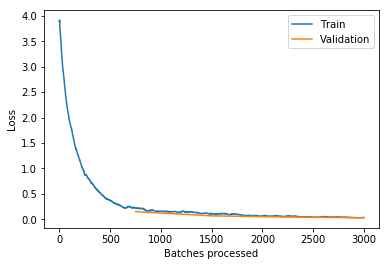

In [58]:
learn.recorder.plot_losses()

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

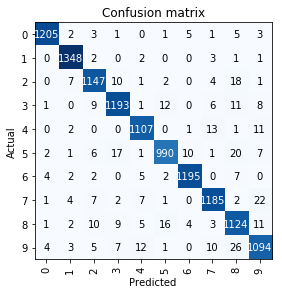

In [10]:
interp.plot_confusion_matrix()

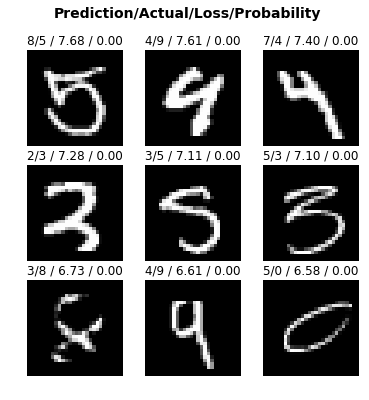

In [14]:
interp.plot_top_losses(9, figsize=(6,6))

In [59]:
learn.save('stage-1')

In [66]:
learn.export('mnist-model.pkl')

In [3]:
# LOAD existing model
learn = load_learner(data_path, 'mnist-model.pkl')
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /Users/gisderdube/Documents/_projects/ai.nosync/vision/mnist/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /Users/gisderdube/Documents/_projects/ai.nosync/vision/mnist/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [4]:
defaults.device = torch.device('cpu')

In [5]:
# Make Prediction

# img = open_image(data_path + '/testing/4/1015.png')
img = open_image(os.getcwd() + '/__predict/pred-hand.png')
img

In [18]:
learn.predict(img)[2]

tensor([2.2875e-07, 9.7415e-08, 2.1566e-06, 9.9995e-01, 5.6506e-08, 1.7627e-05,
        1.3911e-06, 3.1096e-06, 1.7752e-05, 6.0543e-06])

In [63]:
learn.load('stage-1')
learn.unfreeze()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


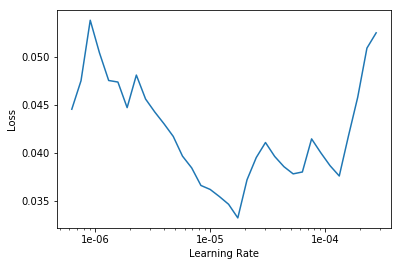

In [64]:

learn.lr_find()
learn.recorder.plot()

In [65]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.036355,0.028697,0.008083,00:27
1,0.040318,0.032511,0.010500,00:28
2,0.021399,0.026351,0.007833,00:28
3,0.024320,0.029740,0.009000,00:28
4,0.009497,0.026286,0.007333,00:27
5,0.008037,0.026459,0.007667,00:28


In [47]:
learn.save('stage-2')